In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
df1 = pd.read_csv("/content/drive/MyDrive/data.csv")

In [54]:
df1

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,15,88,822,7,4,458,356,220,0,65.428571,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Normal
1,27,88,1112,9,7,3134,3054,1552,0,348.222222,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Normal
2,31,49671,26361049,21,14,3720,2672,936,0,177.142857,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Normal
3,41,389,1,2,0,7,0,7,0,3.500000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Normal
4,56,88,1122,10,6,3150,3152,1575,0,315.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520710,692350,80,11502682,8,6,495,11632,495,0,61.875000,...,32,740.0,0.0,740,740,6500545.0,0.0,6500545,6500545,Dos/DdoS
520711,692358,80,11500965,7,5,296,11632,296,0,42.285714,...,32,870.0,0.0,870,870,6498892.0,0.0,6498892,6498892,Dos/DdoS
520712,692395,80,11501780,7,5,375,11632,375,0,53.571429,...,32,880.0,0.0,880,880,6499656.0,0.0,6499656,6499656,Dos/DdoS
520713,692591,80,11514480,8,6,436,11632,436,0,54.500000,...,32,897.0,0.0,897,897,6509268.0,0.0,6509268,6509268,Dos/DdoS


In [55]:
import numpy as np

In [56]:
df1.replace([np.inf, -np.inf], np.nan, inplace=True)

# Dropping all the rows with nan values
df1.dropna(inplace=True)
df1.isin([np.inf, -np.inf]).sum()

Unnamed: 0                 0
 Destination Port          0
 Flow Duration             0
 Total Fwd Packets         0
 Total Backward Packets    0
                          ..
Idle Mean                  0
 Idle Std                  0
 Idle Max                  0
 Idle Min                  0
 Label                     0
Length: 80, dtype: int64

In [57]:

d_1 = df1.iloc[:,0]
d_4 = df1.iloc[:,1]
d_6 = df1.iloc[:,3]
d_70 = df1.iloc[:,14]
d_72 = df1.iloc[:,15]
d_73 = df1.iloc[:,18]
d_48 = df1.iloc[:,21]
d_69 = df1.iloc[:,28]
d_8 = df1.iloc[:,37]
d_30 = df1.iloc[:,47]
d_76 = df1.iloc[:,53]
d_12 = df1.iloc[:,5]
d_25 = df1.iloc[:,67]
d_65 = df1.iloc[:,68]


In [58]:
d78 = df1.iloc[:,-1]

In [59]:
dfea =pd.DataFrame([d_1,d_4,d_6,d_70,d_72,d_73,d_48,d_69,d_8,d_30,d_76,d_12,d_25,d_65,d78])

In [60]:
network_data=dfea.T

In [61]:
clean_data = network_data.dropna()

In [12]:
clean_data.reset_index(inplace=True, drop=True)

In [13]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
u = l.fit_transform(clean_data.iloc[:,-1])

In [14]:
import numpy as np
data_1 = u[u == 0]
data_2 = u[u == 1]
data_3 = u[u == 2]
data_4 = u[u == 3]
data_5 = u[u == 4]
data_6 = u[u == 5]
data_7 = u[u == 6]


# make benign feature
y_1 = np.zeros(data_1.shape[0])
y_benign = pd.DataFrame(y_1)

# make bruteforce feature
y_2 = np.ones(data_2.shape[0])
y_bf = pd.DataFrame(y_2)

# make bruteforceSSH feature
y_3 = np.full(data_3.shape[0], 2)
y_ssh = pd.DataFrame(y_3)

y_4 = np.full(data_4.shape[0], 2)
y_ssh1 = pd.DataFrame(y_4)

y_5 = np.full(data_5.shape[0], 2)
y_ssh2 = pd.DataFrame(y_5)

y_6 = np.full(data_6.shape[0], 2)
y_ssh3 = pd.DataFrame(y_6)

y_7 = np.full(data_7.shape[0], 2)
y_ssh4 = pd.DataFrame(y_7)


# merging the original dataframe
y = pd.concat([y_benign, y_bf, y_ssh,y_ssh1,y_ssh2,y_ssh3,y_ssh4], sort=True).reset_index(drop=True)


In [15]:
y = u/6.0
x = clean_data.iloc[:,:-1]

In [16]:
from keras.utils import to_categorical
y = to_categorical(y,num_classes=7)

In [17]:
clean_data.reset_index(inplace=True, drop=True)

In [18]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
u = l.fit_transform(clean_data.iloc[:,-1])

In [19]:
import numpy as np
data_1 = u[u == 0]
data_2 = u[u == 1]
data_3 = u[u == 2]
data_4 = u[u == 3]
data_5 = u[u == 4]
data_6 = u[u == 5]
data_7 = u[u == 6]


# make benign feature
y_1 = np.zeros(data_1.shape[0])
y_benign = pd.DataFrame(y_1)

# make bruteforce feature
y_2 = np.ones(data_2.shape[0])
y_bf = pd.DataFrame(y_2)

# make bruteforceSSH feature
y_3 = np.full(data_3.shape[0], 2)
y_ssh = pd.DataFrame(y_3)

y_4 = np.full(data_4.shape[0], 2)
y_ssh1 = pd.DataFrame(y_4)

y_5 = np.full(data_5.shape[0], 2)
y_ssh2 = pd.DataFrame(y_5)

y_6 = np.full(data_6.shape[0], 2)
y_ssh3 = pd.DataFrame(y_6)

y_7 = np.full(data_7.shape[0], 2)
y_ssh4 = pd.DataFrame(y_7)


# merging the original dataframe
y = pd.concat([y_benign, y_bf, y_ssh,y_ssh1,y_ssh2,y_ssh3,y_ssh4], sort=True).reset_index(drop=True)


In [20]:
x = clean_data.iloc[:,:-1]
y =u

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [22]:
print(x.shape[0])

520369


In [23]:
from keras.utils import to_categorical

y = to_categorical(y,num_classes=7)

In [24]:
train_prop = 0.8
indices = np.random.permutation(x.shape[0])
split_point = int(x.shape[0] * train_prop)

X_train, y_train = x[indices[:split_point]], y[indices[:split_point]]
X_test, y_test = x[indices[split_point:]], y[indices[split_point:]]

In [27]:
pip install tabnet

In [62]:
fd = clean_data

In [63]:
import pandas as pd

# Assuming df1 is your DataFrame
# Set the 'Unnamed: 0' column as the index
fd.set_index('Unnamed: 0', inplace=True)

# If you want to keep the 'Label' column, you can do this:
# Extract the 'Label' column and save it
labels = fd[' Label']

# Drop the 'Label' column from the DataFrame
df1.drop(columns=[' Label'], inplace=True)

# Now, df1 contains all columns except 'Label', and 'labels' contains the 'Label' column.


In [64]:
r = fd.columns.tolist()

In [65]:
r

[' Destination Port',
 ' Total Fwd Packets',
 ' Bwd Packet Length Std',
 'Flow Bytes/s',
 ' Flow IAT Std',
 'Fwd IAT Total',
 ' Bwd IAT Std',
 'Fwd Packets/s',
 ' PSH Flag Count',
 ' Average Packet Size',
 'Total Length of Fwd Packets',
 'Init_Win_bytes_forward',
 ' Init_Win_bytes_backward',
 ' Label']

In [74]:
pip install pytorch_tabnet

In [72]:
"from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.feature_column import TabNetCategoricalEmbeddingColumn, TabNetNumericalColumn
import pandas as pd


numerical_columns = [
    ' Total Fwd Packets',
    ' Bwd Packet Length Std',
    'Flow Bytes/s',
    ' Flow IAT Std',
    'Fwd IAT Total',
    ' Bwd IAT Std',
    'Fwd Packets/s',
    ' PSH Flag Count',
    ' Average Packet Size',
    'Total Length of Fwd Packets',
    'Init_Win_bytes_forward',
    ' Init_Win_bytes_backward',
]

feature_columns = []
for column in numerical_columns:
    feature_columns.append(TabNetNumericalColumn(column))
categorical_columns = [
    ' Destination Port',
]
for column in categorical_columns:
    feature_columns.append(TabNetCategoricalEmbeddingColumn(column, embedding_dim=16))

ModuleNotFoundError: ignored

In [68]:
from tabnet import TabNetClassifier

# Create the TabNet model
model = TabNetClassifier(feature_columns=r,num_classes=7,feature_dim=64, output_dim=7)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = np.mean(y_pred == y_test)

print('Accuracy:', accuracy)


[TabNet]: 57 features will be used for decision steps.


ValueError: ignored

In [25]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define your GNN model using Keras Functional API
input_dim = X_train.shape[1]
output_dim = 7  # Number of classes

input_layer = Input(shape=(input_dim,))
x = Dense(64, activation='relu')(input_layer)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
output_layer = Dense(output_dim, activation='softmax')(x)

gnn_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
optimizer = Adam(learning_rate=0.001)
gnn_model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 50

history = gnn_model.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = gnn_model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


Epoch 1/50
6505/6505 [==============================] - 17s 2ms/step - loss: 0.1844 - accuracy: 0.9438 - val_loss: 0.0943 - val_accuracy: 0.9686
Epoch 2/50
6505/6505 [==============================] - 15s 2ms/step - loss: 0.0991 - accuracy: 0.9654 - val_loss: 0.0706 - val_accuracy: 0.9734
Epoch 3/50
6505/6505 [==============================] - 17s 3ms/step - loss: 0.0845 - accuracy: 0.9705 - val_loss: 0.0602 - val_accuracy: 0.9804
Epoch 4/50
6505/6505 [==============================] - 16s 2ms/step - loss: 0.0772 - accuracy: 0.9730 - val_loss: 0.0592 - val_accuracy: 0.9803
Epoch 5/50
6505/6505 [==============================] - 15s 2ms/step - loss: 0.0723 - accuracy: 0.9745 - val_loss: 0.0539 - val_accuracy: 0.9810
Epoch 6/50
6505/6505 [==============================] - 14s 2ms/step - loss: 0.0690 - accuracy: 0.9755 - val_loss: 0.0524 - val_accuracy: 0.9778
Epoch 7/50
6505/6505 [==============================] - 14s 2ms/step - loss: 0.0664 - accuracy: 0.9765 - val_loss: 0.0488 - val_ac

KeyboardInterrupt: ignored

In [ ]:
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.models import Sequential

In [ ]:
def model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(14, 1)))
    model.add(BatchNormalization())

    # adding a pooling layer
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(79, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(72, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(7, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
from sklearn.model_selection import train_test_split
x_train_f,x_test_f, y_train_f, y_test_f= train_test_split(x,y, test_size=0.3, random_state=12)

NameError: ignored

In [ ]:
train_prop = 0.8
indices = np.random.permutation(x.shape[0])
split_point = int(x.shape[0] * train_prop)

X_train, y_train = x[indices[:split_point]], y[indices[:split_point]]
X_test, y_test = x[indices[split_point:]], y[indices[split_point:]]

In [ ]:
t = np.argmax(y_train, axis=1)
r = pd.DataFrame(t)
r.value_counts()

4    347720
2     51688
5     14717
1      1514
6       349
0       302
3         5
dtype: int64

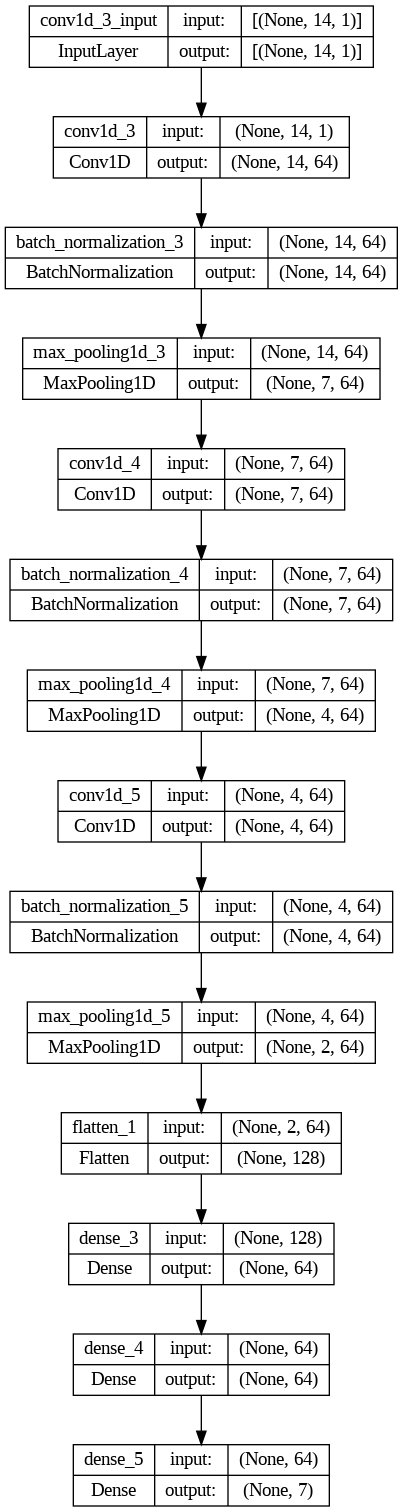

In [ ]:
mo = model()
from tensorflow.keras.utils import plot_model
plot_model(mo, to_file='model_diagram.png', show_shapes=True)

In [ ]:
mo = model()
his = mo.fit(X_train, y_train, epochs=50, batch_size=32,validation_split=0.2)

Epoch 1/50
10408/10408 [==============================] - 87s 8ms/step - loss: 0.0774 - accuracy: 0.9689 - val_loss: 0.0491 - val_accuracy: 0.9787
Epoch 2/50
10408/10408 [==============================] - 83s 8ms/step - loss: 0.0423 - accuracy: 0.9823 - val_loss: 0.0625 - val_accuracy: 0.9804
Epoch 3/50
10408/10408 [==============================] - 77s 7ms/step - loss: 0.0306 - accuracy: 0.9883 - val_loss: 0.0257 - val_accuracy: 0.9902
Epoch 4/50
10408/10408 [==============================] - 78s 8ms/step - loss: 0.0257 - accuracy: 0.9902 - val_loss: 0.0233 - val_accuracy: 0.9909
Epoch 5/50
10408/10408 [==============================] - 84s 8ms/step - loss: 0.0228 - accuracy: 0.9913 - val_loss: 0.0311 - val_accuracy: 0.9899
Epoch 6/50
10408/10408 [==============================] - 79s 8ms/step - loss: 0.0213 - accuracy: 0.9918 - val_loss: 0.0627 - val_accuracy: 0.9810
Epoch 7/50
10408/10408 [==============================] - 79s 8ms/step - loss: 0.0200 - accuracy: 0.9923 - val_loss: 0

In [ ]:
r = mo.predict(X_test)

3253/3253 [==============================] - 8s 2ms/step


In [ ]:
r  = np.argmax(r, axis=1)
y_test_f = np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test_f, r, digits=5))

              precision    recall  f1-score   support

           0    0.83133   0.80233   0.81657        86
           1    0.99417   0.97429   0.98413       350
           2    0.99313   0.99798   0.99555     12898
           3    0.00000   0.00000   0.00000         2
           4    0.99535   0.99835   0.99684     87026
           5    0.98763   0.92346   0.95447      3632
           6    1.00000   0.03750   0.07229        80

    accuracy                        0.99469    104074
   macro avg    0.82880   0.67627   0.68855    104074
weighted avg    0.99465   0.99469   0.99428    104074



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix

# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test_f, r)

# calculate the number of false alarms
num_false_alarms = 0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i != j:
            num_false_alarms += cm[i][j]

# calculate the total number of predictions
num_predictions = sum(sum(cm))

# calculate the false alarm rate
false_alarm_rate = num_false_alarms / num_predictions

print("False alarm rate: {:.4f}".format(false_alarm_rate))

False alarm rate: 0.0053


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

In [ ]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(14, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=7))

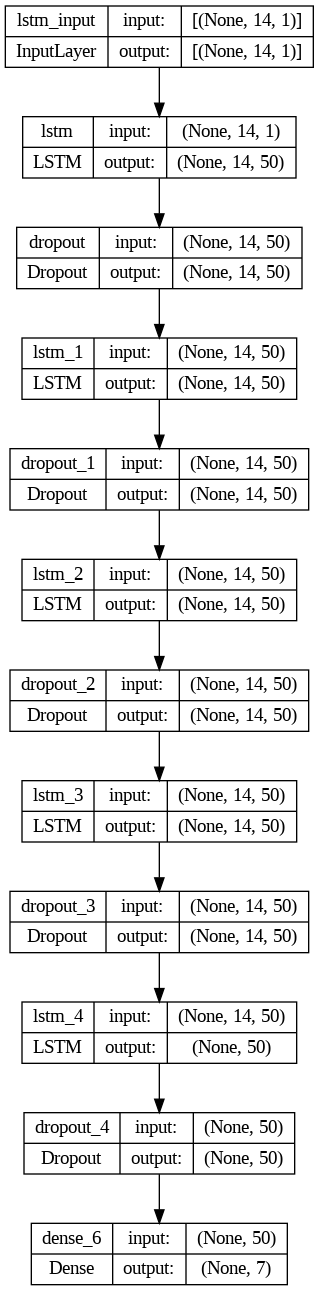

In [ ]:
plot_model(model, to_file='lstm.png', show_shapes=True)

In [ ]:
model.compile(optimizer="adam",loss="mean_squared_error",metrics=['accuracy'])

In [ ]:
his = model.fit(X_train, y_train, epochs=50, batch_size=32,validation_split=0.2)

Epoch 1/50
10408/10408 [==============================] - 467s 44ms/step - loss: 0.0171 - accuracy: 0.9289 - val_loss: 0.0105 - val_accuracy: 0.9517
Epoch 2/50
10408/10408 [==============================] - 463s 45ms/step - loss: 0.0100 - accuracy: 0.9563 - val_loss: 0.0074 - val_accuracy: 0.9669
Epoch 3/50
10408/10408 [==============================] - 455s 44ms/step - loss: 0.0077 - accuracy: 0.9661 - val_loss: 0.0069 - val_accuracy: 0.9653
Epoch 4/50
10408/10408 [==============================] - 456s 44ms/step - loss: 0.0065 - accuracy: 0.9712 - val_loss: 0.0045 - val_accuracy: 0.9803
Epoch 5/50
10408/10408 [==============================] - 456s 44ms/step - loss: 0.0059 - accuracy: 0.9746 - val_loss: 0.0042 - val_accuracy: 0.9809
Epoch 6/50
10408/10408 [==============================] - 457s 44ms/step - loss: 0.0053 - accuracy: 0.9775 - val_loss: 0.0047 - val_accuracy: 0.9774
Epoch 7/50
10408/10408 [==============================] - 455s 44ms/step - loss: 0.0050 - accuracy: 0.9793

In [ ]:
r= gnn_model.predict(X_test)

3253/3253 [==============================] - 4s 1ms/step


In [ ]:
r  = np.argmax(r, axis=1)
y_test_f = np.argmax(y_test, axis=1)

In [ ]:
print(classification_report(y_test_f, r, digits=5))

              precision    recall  f1-score   support

           0    0.80000   0.57778   0.67097        90
           1    0.99675   0.76750   0.86723       400
           2    0.99257   0.95183   0.97177     12766
           3    0.00000   0.00000   0.00000         1
           4    0.97962   0.99823   0.98884     87010
           5    0.99778   0.72468   0.83958      3723
           6    0.48913   0.53571   0.51136        84

    accuracy                        0.98112    104074
   macro avg    0.75084   0.65082   0.69282    104074
weighted avg    0.98136   0.98112   0.98027    104074



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
r  = np.argmax(r, axis=1)

AxisError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix

# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test_f, r)

# calculate the number of false alarms
num_false_alarms = 0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if i != j:
            num_false_alarms += cm[i][j]

# calculate the total number of predictions
num_predictions = sum(sum(cm))

# calculate the false alarm rate
false_alarm_rate = num_false_alarms / num_predictions

print("False alarm rate: {:.4f}".format(false_alarm_rate))

False alarm rate: 0.0189


In [ ]:
pip install tensorflow scikit-learn

In [ ]:
import numpy as np
from keras.layers import Input, Flatten, Dense, Lambda
from keras.models import Model
from keras import backend as K

# Define the input shape
input_shape = (14, 1)

# Define the base network (shared weights)
def base_network(input_shape):
    input = Input(shape=input_shape)
    x = Flatten()(input)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    return Model(input, x)

# Create two input layers for the two instances
input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

# Share weights by using the same base network for both inputs
base_network = base_network(input_shape)
encoded_a = base_network(input_a)
encoded_b = base_network(input_b)

# Define the similarity measure (Euclidean distance)
def euclidean_distance(vects):
    x, y = vects
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))

# Merge the encoded representations and compute the distance
distance = Lambda(euclidean_distance)([encoded_a, encoded_b])

# Create the final model that outputs the distance
model = Model(inputs=[input_a, input_b], outputs=distance)

# Compile the model (customize the loss and optimizer as needed)
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the Siamese Network using your training data
model.fit([X_train, X_train], y_train, batch_size=64, epochs=10, validation_split=0.2)

# Evaluate the model on the test data
accuracy = model.evaluate([X_test, X_test], y_test)
print(f'Test accuracy: {accuracy[1] * 100:.2f}%')


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


ValueError: ignored